In [1]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DS_US=df[(df['job_country']=="United States")&(df['job_title_short']=="Data Analyst")]
df_DS_US=df_DS_US.dropna(subset='salary_year_avg')
df_DS_US=df_DS_US.explode('job_skills')
df_DS_US[['salary_year_avg','job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [3]:
#total_jobs=df_DS_US['job_skills'].count()
total_jobs=len(df_DS_US)
df_skill_perc=df_DS_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)
df_skill_perc=df_skill_perc.rename(columns={'count':'skill_count','median':'median_salary'})
df_skill_perc['skill_percent']=df_skill_perc['skill_count']/total_jobs*100
df_skill_perc

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.0,14.380734
excel,1808,84392.0,10.366972
python,1431,97500.0,8.205275
tableau,1364,92875.0,7.821101
sas,926,90000.0,5.309633
...,...,...,...
couchbase,1,160515.0,0.005734
chainer,1,100000.0,0.005734
chef,1,85000.0,0.005734


In [9]:
skill_limit = 3

df_DA_skills_high_demand = df_skill_perc[df_skill_perc['skill_percent'] > skill_limit]

In [10]:
df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.0,14.380734
excel,1808,84392.0,10.366972
python,1431,97500.0,8.205275
tableau,1364,92875.0,7.821101
sas,926,90000.0,5.309633
r,893,92500.0,5.120413
power bi,838,90000.0,4.805046


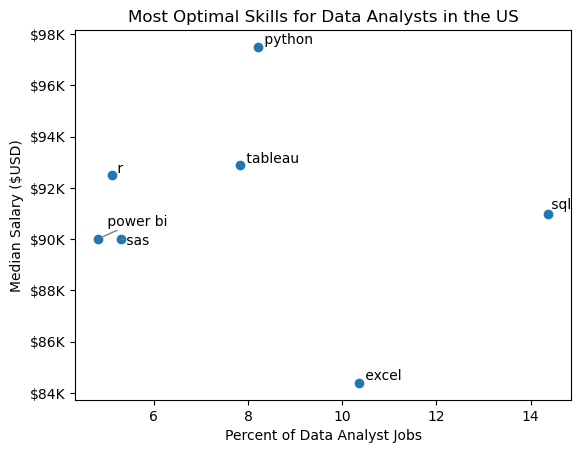

In [11]:
from adjustText import adjust_text

plt.scatter(df_DA_skills_high_demand['skill_percent'], df_DA_skills_high_demand['median_salary'])
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')  # Assuming this is the label you want for y-axis
plt.title('Most Optimal Skills for Data Analysts in the US')

# Get current axes, set limits, and format axes
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))  # Example formatting y-axis

# Add labels to points and collect them in a list
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], " " + txt))

# Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()

In [13]:
df['job_type_skills']

0                                                      None
1         {'analyst_tools': ['power bi', 'tableau'], 'pr...
2         {'analyst_tools': ['dax'], 'cloud': ['azure'],...
3         {'cloud': ['aws'], 'libraries': ['tensorflow',...
4         {'cloud': ['oracle', 'aws'], 'other': ['ansibl...
                                ...                        
785736    {'os': ['linux', 'unix'], 'other': ['kubernete...
785737    {'analyst_tools': ['sas', 'excel'], 'programmi...
785738           {'analyst_tools': ['powerpoint', 'excel']}
785739    {'cloud': ['aws', 'snowflake', 'azure', 'redsh...
785740                {'cloud': ['aws'], 'other': ['flow']}
Name: job_type_skills, Length: 785741, dtype: object

In [14]:
df_technology=df['job_type_skills'].copy()
df_technology=df_technology.drop_duplicates()
df_technology=df_technology.dropna()
technology_dict={}
for row in df_technology:
    row_dict=ast.literal_eval(row)
    for key , value in row_dict.items():
        if key in technology_dict:
           technology_dict[key]+=value
        else:
            technology_dict[key]=value
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict               
         
       



{'analyst_tools': ['splunk',
  'word',
  'excel',
  'msaccess',
  'sharepoint',
  'tableau',
  'microstrategy',
  'visio',
  'cognos',
  'esquisse',
  'ssis',
  'qlik',
  'sap',
  'power bi',
  'powerpoint',
  'ssrs',
  'spss',
  'sheets',
  'nuix',
  'powerbi',
  'datarobot',
  'spreadsheet',
  'sas',
  'ms access',
  'dax',
  'outlook',
  'looker',
  'alteryx'],
 'programming': ['rust',
  'no-sql',
  'objective-c',
  'fortran',
  'go',
  'typescript',
  'visual basic',
  'mongodb',
  'sql',
  'c++',
  'nosql',
  'matlab',
  'pascal',
  'vba',
  'c#',
  'c',
  'erlang',
  't-sql',
  'f#',
  'lua',
  'haskell',
  'css',
  'java',
  'vb.net',
  'kotlin',
  'cobol',
  'delphi',
  'perl',
  'php',
  'golang',
  'shell',
  'apl',
  'swift',
  'julia',
  'groovy',
  'assembly',
  'solidity',
  'powershell',
  'crystal',
  'visualbasic',
  'dart',
  'html',
  'lisp',
  'elixir',
  'ruby',
  'clojure',
  'javascript',
  'sas',
  'sass',
  'scala',
  'mongo',
  'r',
  'python',
  'ocaml',
  'b

In [15]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,splunk
0,analyst_tools,word
0,analyst_tools,excel
0,analyst_tools,msaccess
0,analyst_tools,sharepoint
...,...,...
9,sync,google chat
9,sync,microsoft teams
9,sync,mattermost
9,sync,twilio


In [16]:
df_DA_skills_tech =df_skill_perc.merge(df_technology, left_on='job_skills', right_on='skills')

df_DA_skills_tech

,skill_count,median_salary,skill_percent,technology,skills
0,2508,91000.0,14.380734,programming,sql
1,1808,84392.0,10.366972,analyst_tools,excel
2,1431,97500.0,8.205275,programming,python
3,1364,92875.0,7.821101,analyst_tools,tableau
4,926,90000.0,5.309633,analyst_tools,sas
...,...,...,...,...,...
169,1,160515.0,0.005734,databases,couchbase
170,1,100000.0,0.005734,libraries,chainer
171,1,85000.0,0.005734,other,chef
172,1,113269.5,0.005734,libraries,cordova


In [17]:
df_DA_skills_tech_high_demand = df_DA_skills_tech[df_DA_skills_tech['skill_percent'] > skill_limit]

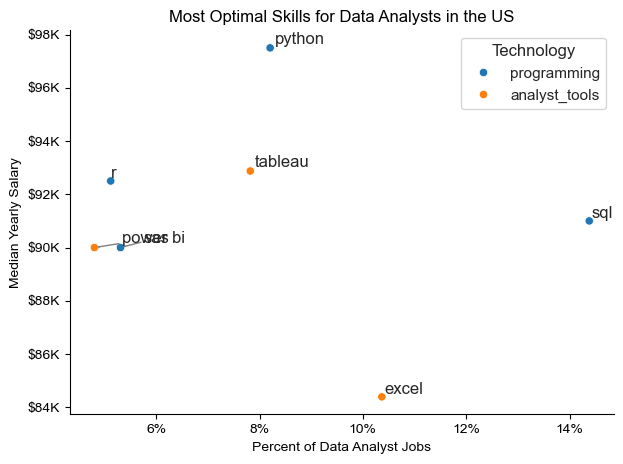

In [18]:
sns.scatterplot(
    data=df_DA_skills_tech_high_demand,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)

sns.despine()
sns.set_theme(style='ticks')

# Prepare texts for adjustText
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Set axis labels, title, and legend
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in the US')
plt.legend(title='Technology')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Adjust layout and display plot 
plt.tight_layout()
plt.show()